https://machinelearningmastery.com/statistical-imputation-for-missing-values-in-machine-learning/?__s=sedr9swwqoxuschybcvu

In [1]:
from pandas import read_csv

In [2]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/horse-colic.csv'

dataframe = read_csv( url , header = None , na_values = '?' )

In [3]:
dataframe.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,2.0,1,530101,38.5,66.0,28.0,3.0,3.0,NaN,2.0,...,45.0,8.4,NaN,NaN,2.0,2,11300,0,0,2
1,1.0,1,534817,39.2,88.0,20.0,NaN,NaN,4.0,1.0,...,50.0,85.0,2.0,2.0,3.0,2,2208,0,0,2
2,2.0,1,530334,38.3,40.0,24.0,1.0,1.0,3.0,1.0,...,33.0,6.7,NaN,NaN,1.0,2,0,0,0,1
3,1.0,9,5290409,39.1,164.0,84.0,4.0,1.0,6.0,2.0,...,48.0,7.2,3.0,5.3,2.0,1,2208,0,0,1
4,2.0,1,530255,37.3,104.0,35.0,NaN,NaN,6.0,2.0,...,74.0,7.4,NaN,NaN,2.0,2,4300,0,0,2


In [4]:
data = dataframe.values

X = data[ : , : -1 ]

y = data[ : , -1 ]

# Evaluation de différentes stratégies d'imputation

In [10]:
from sklearn.pipeline import Pipeline

from sklearn.impute import SimpleImputer

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.model_selection import cross_val_score

from numpy import mean

from numpy import std

In [28]:
results = list()

strategies = [ 'mean' , 'median' , 'most_frequent' , 'constant' ]

In [29]:
for s in strategies :
    
    steps = [ ( 'step_imput' , SimpleImputer( strategy = s ) ) ,
              ( 'step_model' , RandomForestClassifier() ) ]
    
    model = Pipeline( steps = steps )
    
    cv = RepeatedStratifiedKFold( n_splits = 10 , n_repeats = 3 , random_state = 1 )
    
    scores = cross_val_score( model , X , y , scoring = 'accuracy' , cv = cv , n_jobs = -1 )
    
    results.append( scores )
    
    print( f' { s } : { mean( scores ) } { std( scores ) }' )

 mean : 0.8199962921764923 0.061258633133729874
 median : 0.800111234705228 0.0723750945769508
 most_frequent : 0.8233370411568409 0.07007379250124145
 constant : 0.8487825979483377 0.05473752430556199


In [30]:
from matplotlib import pyplot

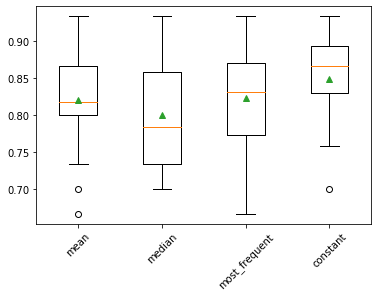

In [31]:
pyplot.boxplot( results , labels = strategies , showmeans = True )
pyplot.xticks( rotation = 45 )
pyplot.show( )

In [ ]:
# => Meilleure stratégie : remplacer NaN par constante